In [ ]:
# GRIP TSF

# TASK - Exploratory Data Analysis - Sports

Author: Aatif Annan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#1st dataset

In [3]:
df = pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df.shape

(756, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
df[pd.isnull(df['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [8]:
df['winner'].fillna('Draw', inplace=True)

In [9]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
df.replace(['Mumbai Indians', 'Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Deccan Chargers', 'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals', 'Rising Pune Supergiant'], 
           ['MI', 'KKR', 'RCB', 'DC', 'CSK', 'RR', 'DD', 'GL', 'KXIP', 'SRH', 'RPS', 'KTK', 'PWA', 'DCA', 'RPS'], inplace=True)

In [11]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [12]:
df[pd.isnull(df['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,MI,RCB,RCB,field,normal,0,RCB,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,KKR,DD,KKR,bat,normal,0,DD,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,CSK,RR,RR,field,normal,0,CSK,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,SRH,DD,SRH,bat,normal,0,SRH,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,MI,CSK,MI,bat,normal,0,CSK,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,RCB,KXIP,KXIP,field,normal,0,KXIP,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,SRH,MI,MI,field,normal,0,SRH,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [13]:
df['city'].fillna('Dubai', inplace=True)
df.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [14]:
df[(df.umpire1.isnull()) | (df.umpire2.isnull())]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,SRH,DCA,DCA,field,normal,0,DCA,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [15]:
df = df.drop('umpire3', axis=1)

In [16]:
city_venue = df.groupby(['city', 'venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   66
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   7
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        67
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Dubai          Dubai International Cricket Stadium                      7
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mohali         IS Bindra Stadium                                        7
               Punjab Cricket Association IS Bindra Stadium, M...       3
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         2
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

In [17]:
#2nd Dataset

In [18]:
df2 = pd.read_csv("deliveries.csv")
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [19]:
df2.replace(['Mumbai Indians', 'Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Deccan Chargers', 'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals', 'Rising Pune Supergiant'], 
           ['MI', 'KKR', 'RCB', 'DC', 'CSK', 'RR', 'DD', 'GL', 'KXIP', 'SRH', 'RPS', 'KTK', 'PWA', 'DCA', 'RPS'], inplace=True)

In [20]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [22]:
df2.shape

(179078, 21)

In [23]:
complete = pd.merge(df2, df, left_on = 'match_id', right_on = 'id')
complete.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


In [24]:
complete.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,1802.252957,2013.444510,0.017914,13.404036,3.261579
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,3472.322805,3.363947,0.132639,23.261007,3.347033
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,2011.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,379.000000,2013.000000,0.000000,0.000000,3.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,567.000000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [25]:
complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [26]:
df.id.is_unique

True

In [27]:
df.set_index('id', inplace = True)

In [28]:
df.describe(include = 'all')

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
count,756.000000,756,756,756,756,756,756,756,756.000000,756,756.000000,756.000000,752,756,754,754
unique,NaN,33,546,14,14,14,2,3,NaN,15,NaN,NaN,226,41,61,65
top,NaN,Mumbai,2009-04-23,MI,RCB,MI,field,normal,NaN,MI,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin
freq,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57
mean,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN
std,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN
min,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN


Data Visualization 

Text(0, 0.5, 'Frequency')

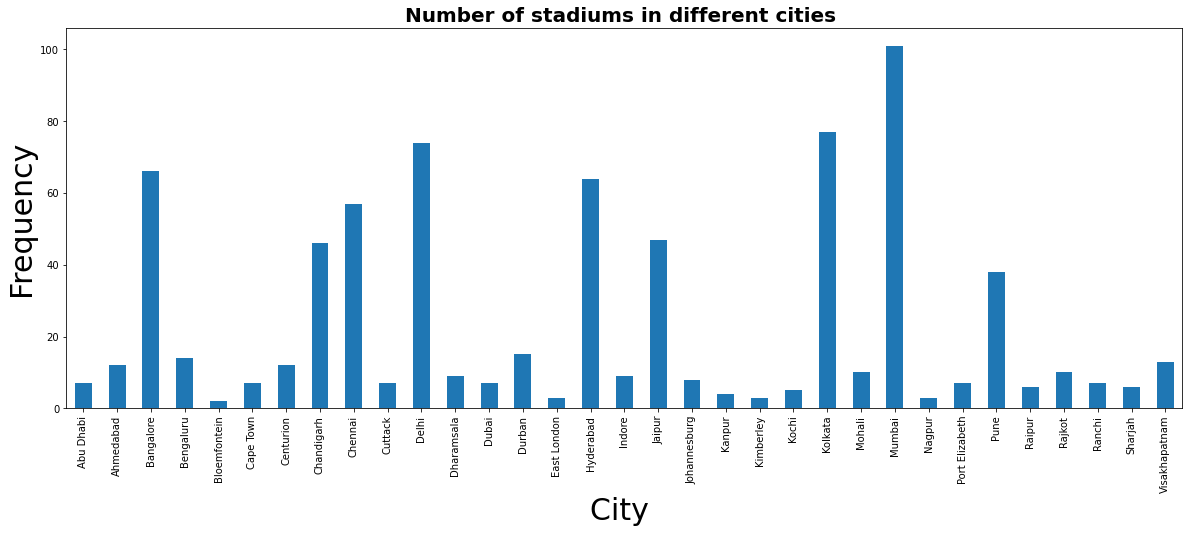

In [29]:
venues = pd.crosstab(df['city'], df['venue'])

venues['count'] = venues.sum(axis = 'columns')
bal = venues['count']

plt.figure(figsize=(20, 7))
bal.plot(kind = 'bar')
plt.title("Number of stadiums in different cities ", fontsize = 20, fontweight = 'bold')
plt.xlabel("City ", size=30)
plt.ylabel("Frequency", size = 30)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Season')

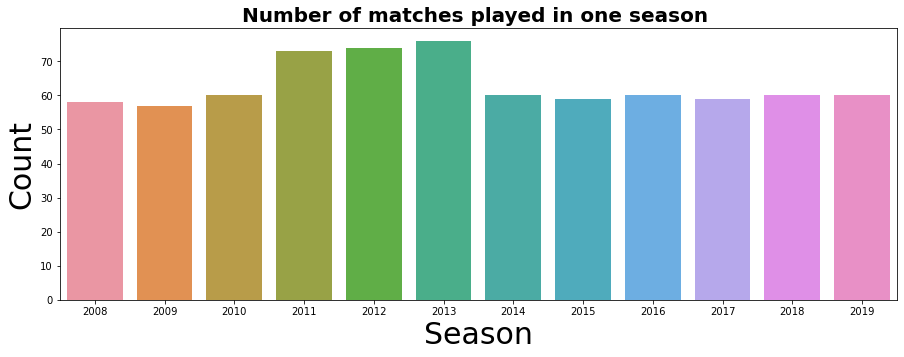

In [30]:
plt.figure(figsize=(15, 5))
sns.countplot('season', data = df)
plt.title("Number of matches played in one season ", fontsize = 20, fontweight = "bold")
plt.ylabel("Count", size = 30)
plt.xlabel("Season", size = 30)

Text(0.5, 0, 'Season')

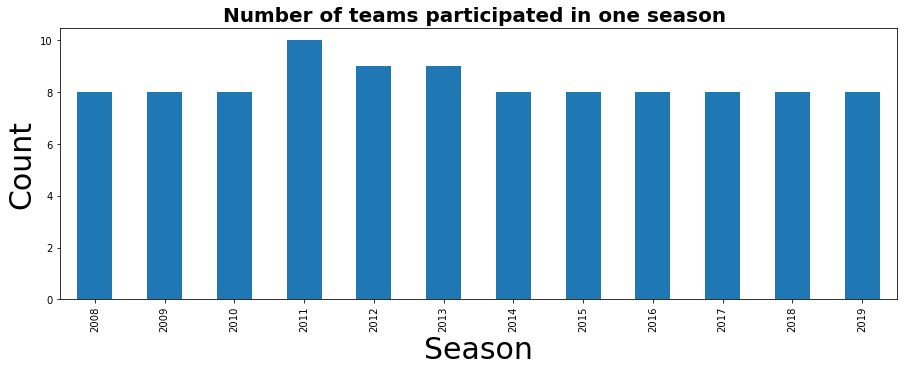

In [31]:
df.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15, 5))
plt.title("Number of teams participated in one season ", fontsize=20, fontweight = "bold")
plt.ylabel("Count", size = 30)
plt.xlabel("Season", size = 30)

Text(0.5, 0, 'Frequency')

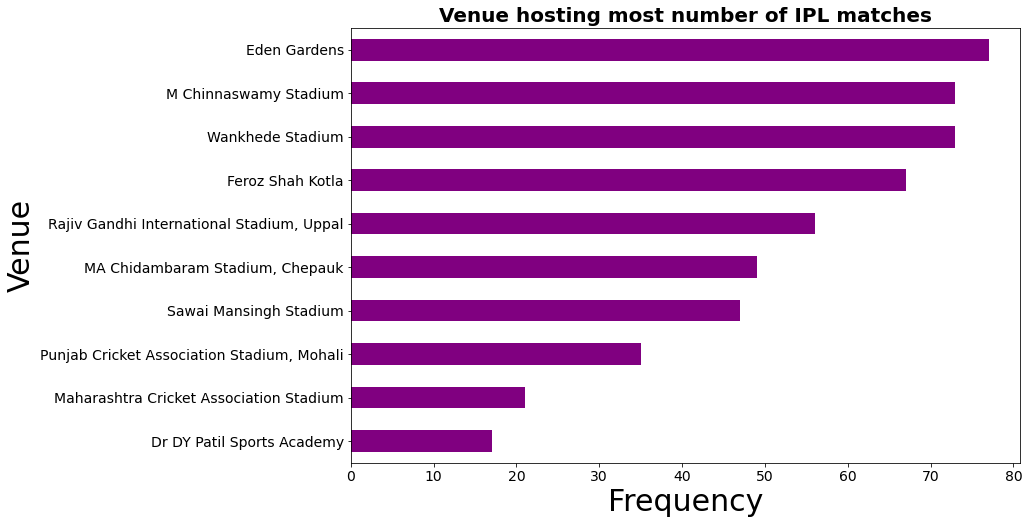

In [33]:
df.venue.value_counts().sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(12, 8), fontsize=14, color = 'purple')
plt.title("Venue hosting most number of IPL matches", fontsize=20, fontweight = "bold")
plt.ylabel("Venue", size=30)
plt.xlabel("Frequency", size=30)

In [39]:
winning_teams = df[['season', 'winner']]

In [42]:
winners_teams = {}
for i in sorted(winning_teams.season.unique()):
    winners_teams[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]

winners_final = pd.Series(winners_teams)
winners_final = pd.DataFrame(winners_final, columns=['team'])

Text(0.5, 0, 'Wins')

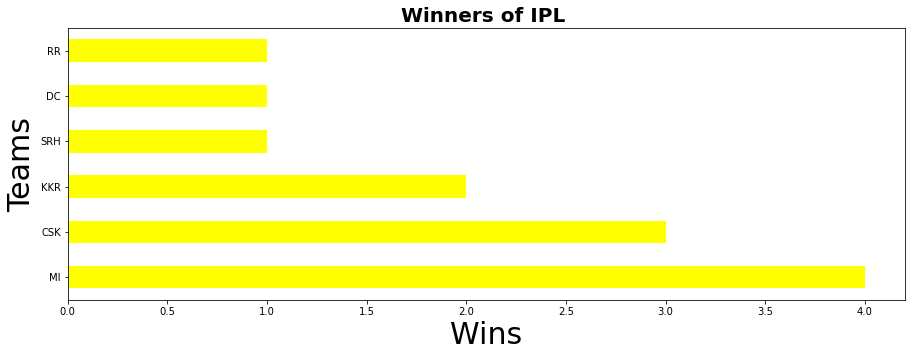

In [43]:
winners_final['team'].value_counts().plot(kind= 'barh', figsize=(15, 5), color= 'yellow')
plt.title("Winners of IPL ", fontsize=20, fontweight = "bold")
plt.ylabel("Teams", size=30)
plt.xlabel("Wins", size=30)

Text(0.5, 0, 'Decision by toss wining captain')

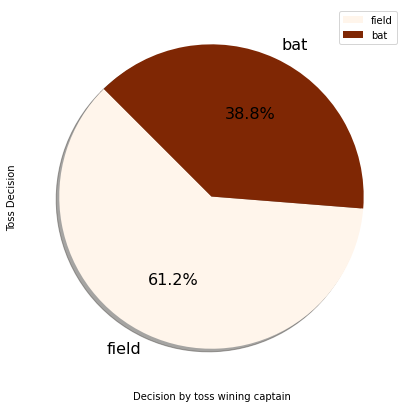

In [46]:
df['toss_decision'].value_counts().plot(kind='pie', fontsize=16, autopct = '%3.1f%%', figsize=(10, 7), shadow = True, startangle = 135, legend = True, cmap = 'Oranges')
plt.ylabel('Toss Decision')
plt.xlabel('Decision by toss wining captain')

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Winning Toss and Winning Matches ')

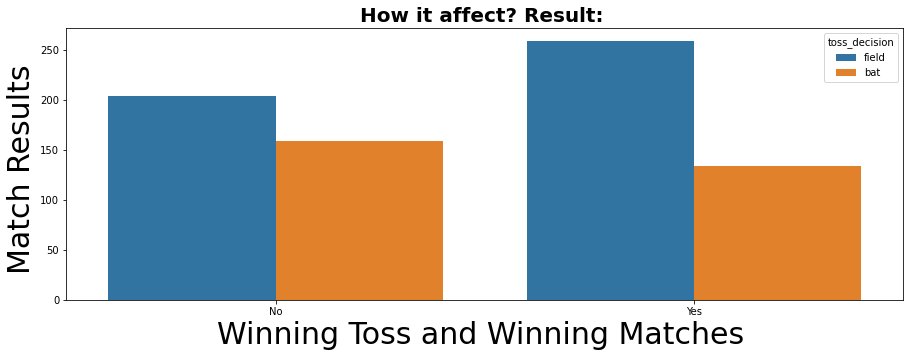

In [47]:
df['toss_win_game'] = np.where((df.toss_winner == df.winner), 'Yes','No')
plt.figure(figsize=(15, 5))
sns.countplot('toss_win_game', data = df, hue="toss_decision")
plt.title("How it affect? Result: ", fontsize=20, fontweight="bold")
plt.ylabel("Match Results ", fontsize=30)
plt.xlabel("Winning Toss and Winning Matches ", fontsize=30)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Toss winner')

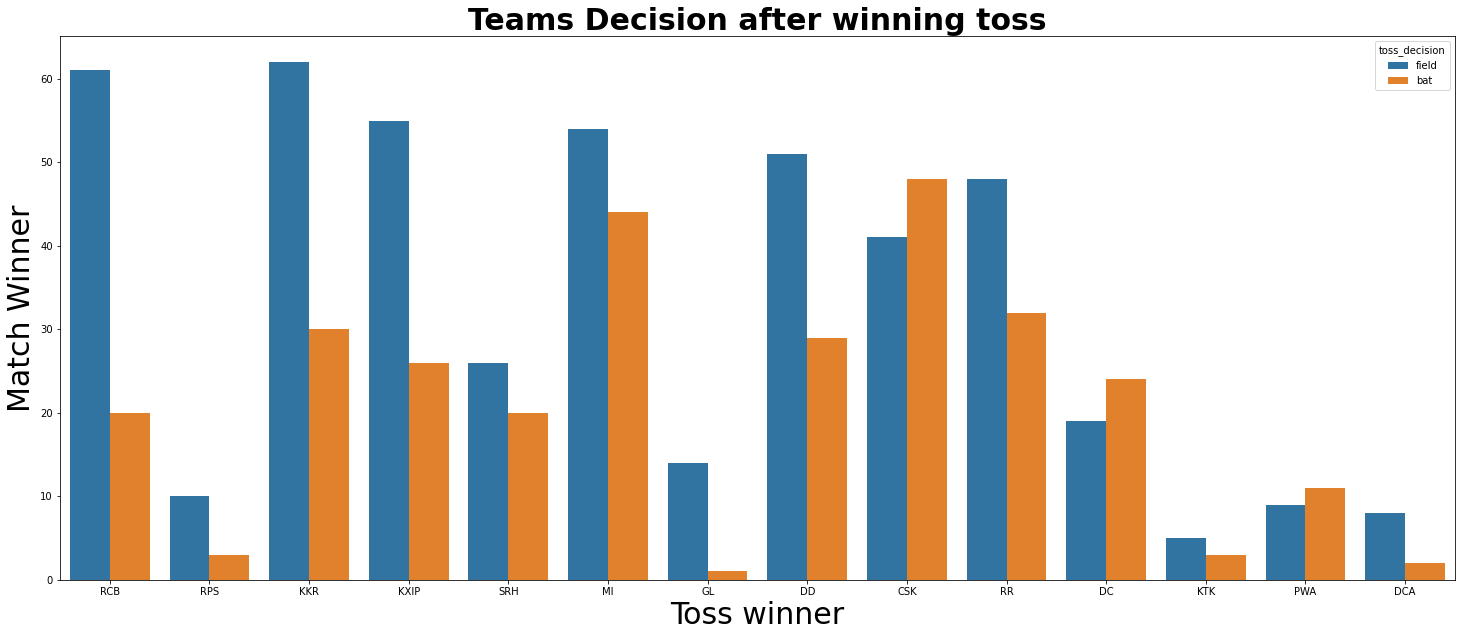

In [50]:
plt.figure(figsize=(25, 10))
sns.countplot('toss_winner', data = df, hue = 'toss_decision')
plt.title("Teams Decision after winning toss", size=30, fontweight="bold")
plt.ylabel("Match Winner", size=30)
plt.xlabel("Toss winner", size=30)

Text(0.5, 0, 'Players')

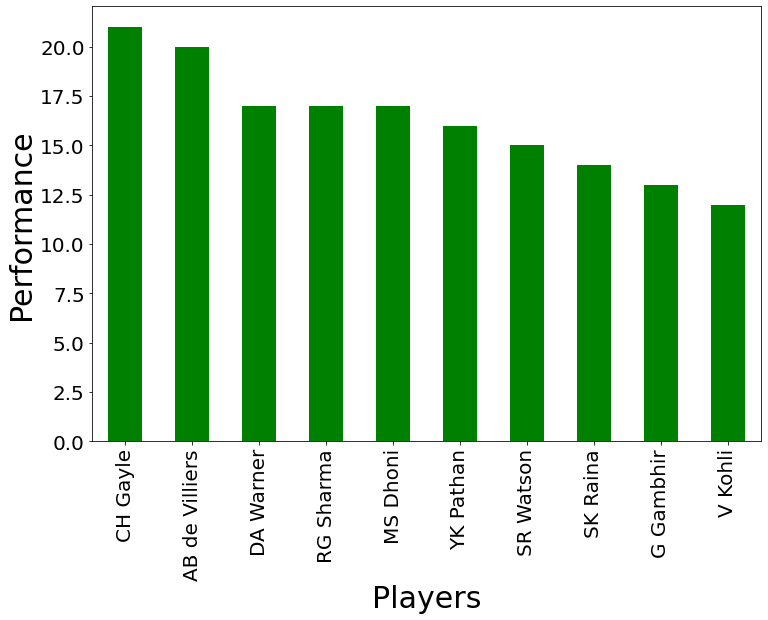

In [51]:
Man_of_match = df['player_of_match'].value_counts()
Man_of_match.head(10).plot(kind='bar', figsize=(12, 8), fontsize=20, color='green')
plt.ylabel("Performance", size=30)
plt.xlabel("Players", size=30)

<ipython-input-70-c552f5137aa5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_matches['win_batting_first'] = np.where((new_matches.win_by_runs > 0), 'Yes','No')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'ACA-VDCA Stadium'),
  Text(0, 1, 'Barabati Stadium'),
  Text(0, 2, 'Brabourne Stadium'),
  Text(0, 3, 'Buffalo Park'),
  Text(0, 4, 'De Beers Diamond Oval'),
  Text(0, 5, 'Dr DY Patil Sports Academy'),
  Text(0, 6, 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'),
  Text(0, 7, 'Dubai International Cricket Stadium'),
  Text(0, 8, 'Eden Gardens'),
  Text(0, 9, 'Feroz Shah Kotla'),
  Text(0, 10, 'Feroz Shah Kotla Ground'),
  Text(0, 11, 'Green Park'),
  Text(0, 12, 'Himachal Pradesh Cricket Association Stadium'),
  Text(0, 13, 'Holkar Cricket Stadium'),
  Text(0, 14, 'IS Bindra Stadium'),
  Text(0, 15, 'JSCA International Stadium Complex'),
  Text(0, 16, 'Kingsmead'),
  Text(0, 17, 'M Chinnaswamy Stadium'),
  Text(0, 18, 'M. A. Chidambaram Stadium'),
  Text(0, 19, 'M. Chinnaswamy St

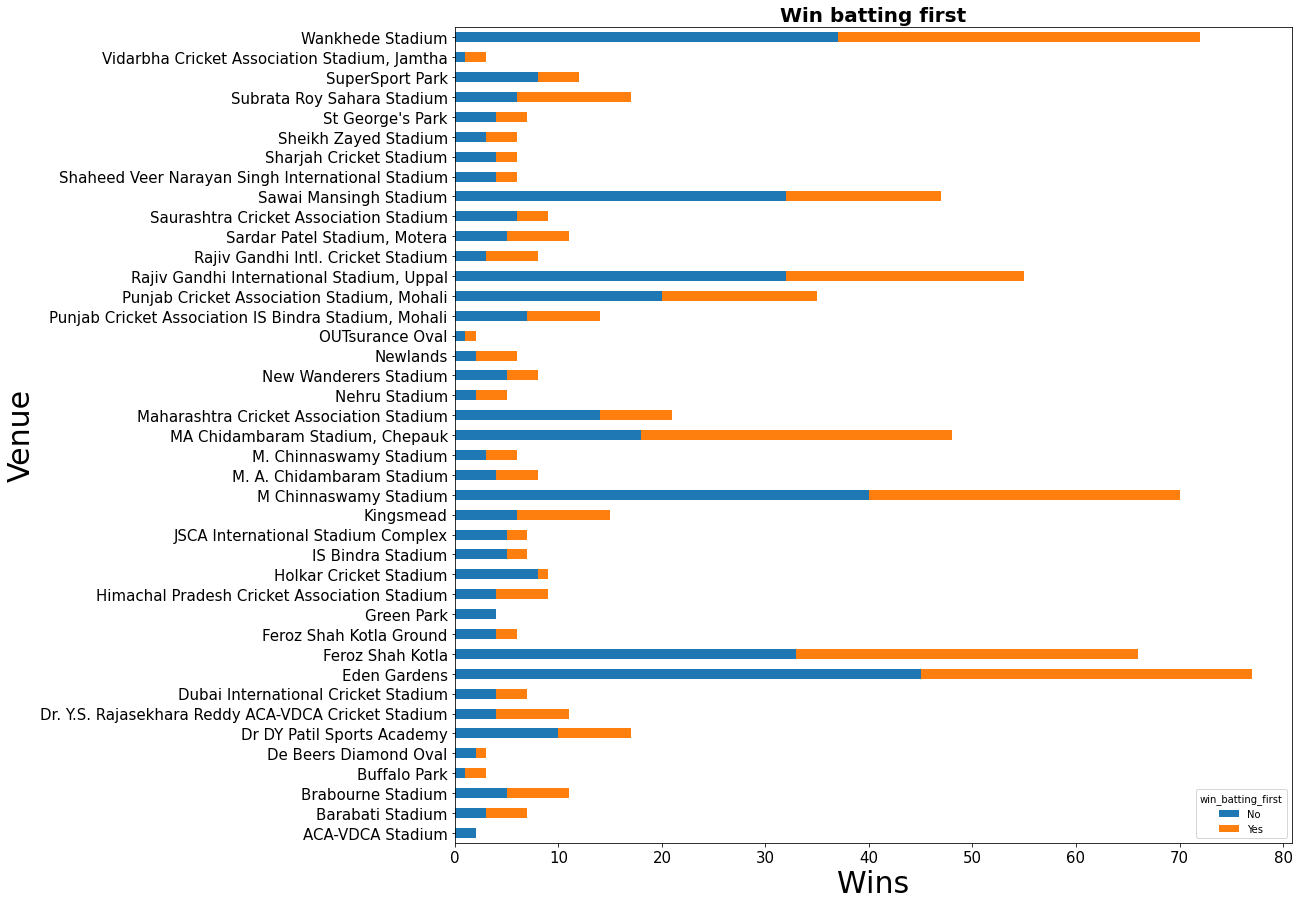

In [70]:
new_matches = df[df['result'] == 'normal']
new_matches['win_batting_first'] = np.where((new_matches.win_by_runs > 0), 'Yes','No')
new_matches.groupby('venue')['win_batting_first'].value_counts().unstack().plot(kind='barh', stacked=True, figsize=(15, 15))

plt.title("Win batting first", fontsize=20, fontweight="bold")
plt.ylabel("Venue", size=30)
plt.xlabel("Wins", size=30)
plt.xticks(size=15)
plt.yticks(size=15)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Season')

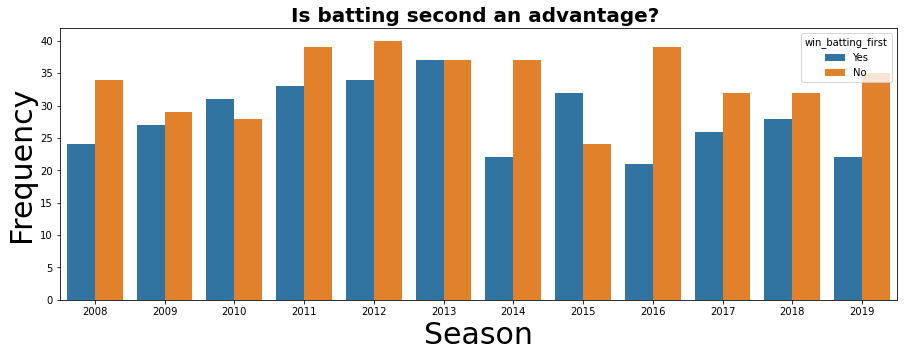

In [71]:
plt.figure(figsize=(15, 5))
sns.countplot('season', data = new_matches, hue='win_batting_first')
plt.title("Is batting second an advantage? ", fontsize=20, fontweight="bold")
plt.ylabel("Frequency", size=30)
plt.xlabel("Season", size=30)

Text(0.5, 0, 'Seasons ')

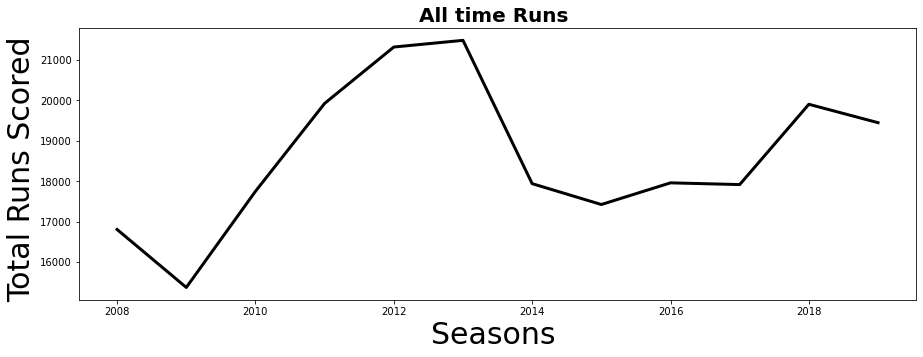

In [72]:
complete.groupby('season')['batsman_runs'].sum().plot(kind='line', linewidth=3, figsize=(15, 5), color='black')
plt.title("All time Runs ", fontsize=20, fontweight="bold")
plt.ylabel("Total Runs Scored ", size=30)
plt.xlabel("Seasons ", size=30)

Text(0.5, 0, 'Batsman')

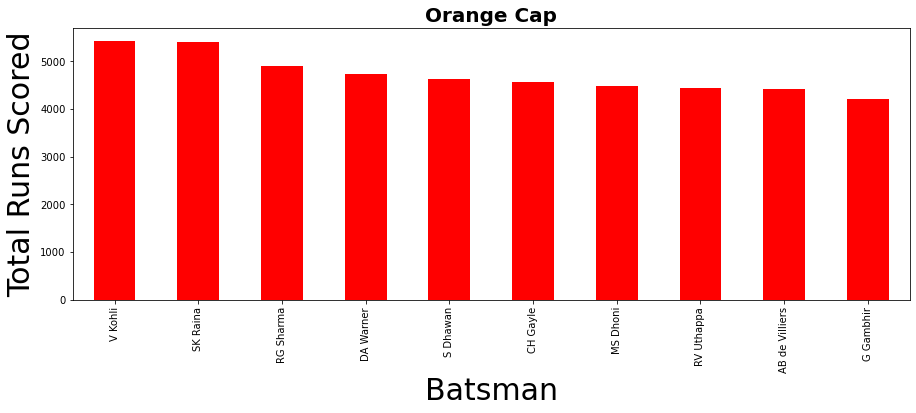

In [73]:
complete.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind='bar', color='red', figsize=(15, 5))
plt.title("Orange Cap", fontsize=20, fontweight="bold")
plt.ylabel("Total Runs Scored", size=30)
plt.xlabel("Batsman", size=30)

Text(0, 0.5, 'Scores')

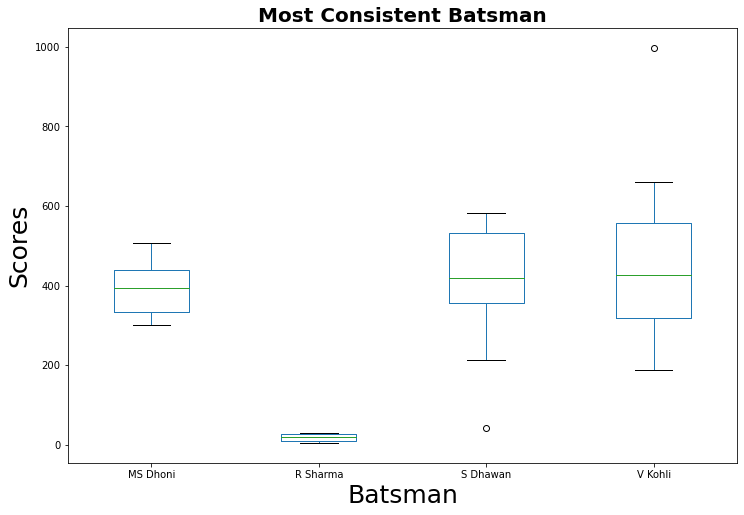

In [86]:
consistent_batsman = complete[complete.batsman.isin(['S Raina', 'V Kohli', 'R Sharma', 'Gambhir', 'Uthappa', 'S Dhawan', 'C Gayle', 'MS Dhoni', 'Warner', 'ABD'])][['batsman', 'season', 'total_runs']]
consistent_batsman.groupby(['season', 'batsman'])['total_runs'].sum().unstack().plot(kind='box', figsize=(12, 8))

plt.title("Most Consistent Batsman", fontsize=20, fontweight="bold")
plt.xlabel("Batsman", size=25)
plt.ylabel("Scores", size=25)

Text(0, 0.5, 'Wickets')

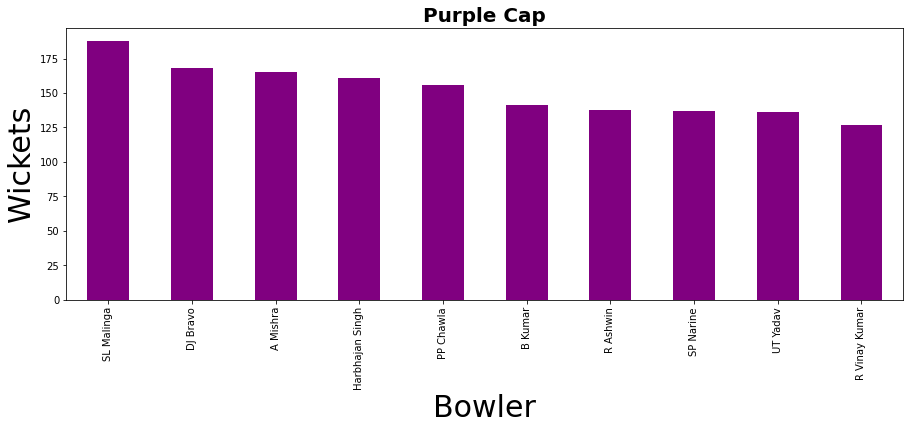

In [89]:
complete.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10).plot(kind='bar', color='purple', figsize=(15, 5))
plt.title("Purple Cap", fontsize=20, fontweight="bold")
plt.xlabel("Bowler", size=30)
plt.ylabel("Wickets", size=30)

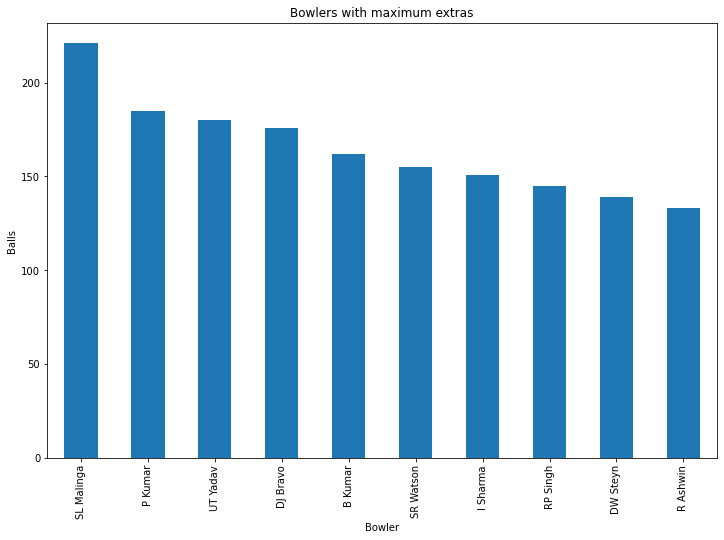

,SL Malinga,P Kumar,UT Yadav,DJ Bravo,B Kumar,SR Watson,I Sharma,RP Singh,DW Steyn,R Ashwin
bowler,221,185,180,176,162,155,151,145,139,133


In [90]:
extras = df2[df2['extra_runs']!=0]['bowler'].value_counts()[:10]
extras.plot(kind='bar', figsize=(12, 8), title='Bowlers with maximum extras')
plt.xlabel('Bowler')
plt.ylabel('Balls')
plt.show()

extras = pd.DataFrame(extras)
extras.T